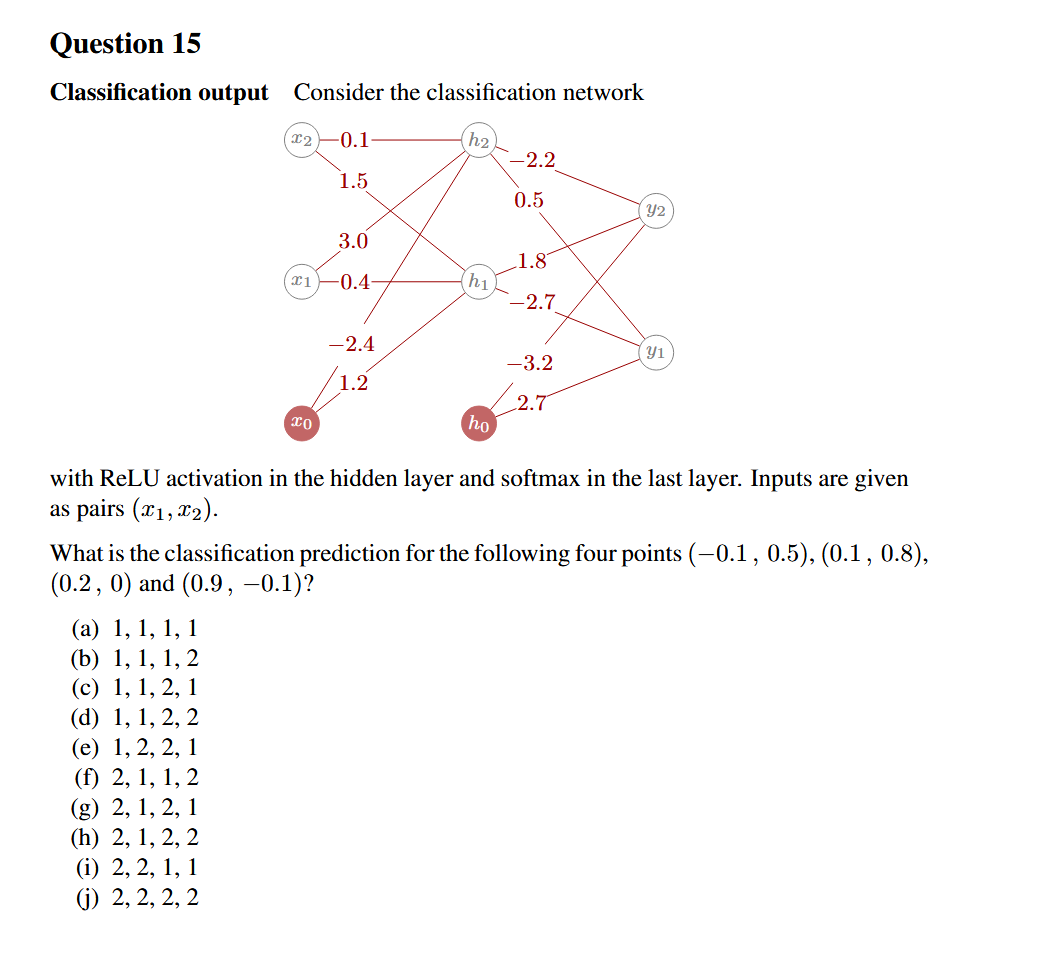

In [2]:
import numpy as np 


def relu(x):
    """Applies the ReLU activation function."""
    return np.maximum(0, x)

def softmax(x):
    """Applies the softmax activation function."""
    e_x = np.exp(x - np.max(x))  # for numerical stability
    return e_x / e_x.sum(axis=0, keepdims=True)

In [47]:
#x_1, x_2 = -0.1, 0.5 
#x_1, x_2 = 0.1, 0.8
#x_1, x_2 = 0.2, 0
x_1, x_2 = 0.9, -0.1

def classification(x_1, x_2):
    h_2 = x_2 * 0.1 + x_1 * 3.0 + (-2.4)
    h_1 = x_1 * 0.1 + x_2 * 1.5 + 1.2 
    z_1 = relu(h_1)
    z_2 = relu(h_2)
    y_2 = z_2 * (2.2) + z_1 * 1.8 + (-3.2)
    y_1 = z_1 * (-2.7) + z_2 * 0.5 + 2.7 
    
    softmax_input = np.array([y_1, y_2])
    softmax_output = softmax(softmax_input)
    return np.argmax(softmax_output)

classification_result = classification(x_1, x_2)
print(f"Classification result: {classification_result + 1}")

Classification result: 1


In [69]:
x = -0.2
t = 0
print(2 *( relu(x) - t) ) 

0.0


In [ ]:
0.2, 0, -1.2, 1.4, 0

In [70]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / exp_x.sum()

def classification(x_1, x_2):
    # Input vector (including bias)
    X = np.array([1, x_1, x_2])
    
    # Weight matrix for hidden layer
    W_h = np.array([
        [1.2, -2.4],  # Bias weights
        [0.4, 3.0],   # Weights for x_1
        [1.5, 0.1]    # Weights for x_2
    ])
    
    # Forward pass to hidden layer
    h_pre = X @ W_h
    h = relu(h_pre)
    
    # Add bias for output layer calculation
    H = np.array([1, h[0], h[1]])
    
    # Weight matrix for output layer
    W_o = np.array([
        [2.7, -3.2],  # Bias weights
        [-2.7, 1.8],  # Weights for h_1
        [0.5, -2.2]   # Weights for h_2
    ])
    
    # Forward pass to output layer
    y_pre = H @ W_o
    y_probs = softmax(y_pre)
    
    return np.argmax(y_probs)

# Test each point
points = [(-0.1, 0.5), (0.1, 0.8), (0.2, 0), (0.9, -0.1)]
for i, (x_1, x_2) in enumerate(points):
    result = classification(x_1, x_2)
    print(f"Point {i+1} ({x_1}, {x_2}): Class {result+1}")

Point 1 (-0.1, 0.5): Class 2
Point 2 (0.1, 0.8): Class 2
Point 3 (0.2, 0): Class 1
Point 4 (0.9, -0.1): Class 1


In [112]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNetLike(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNetLike, self).__init__()
        
        # Contracting path (encoder)
        # First level
        self.conv1_1 = nn.Conv2d(in_channels, 64, kernel_size=3, padding=0)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Second level
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=0)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Bottom level
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=0)
        
        # Expansive path (decoder)
        # Second level
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.conv4_1 = nn.Conv2d(256, 128, kernel_size=3, padding=0)  # 256 because of concatenation
        
        # First level
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        
        # Fixed to accept 128 input channels (64+64 from concat)
        self.conv5_1 = nn.Conv2d(128, 64, kernel_size=3, padding=0)  # Changed from 256 to 128
        
        # Output layer
        self.conv_out = nn.Conv2d(64, out_channels, kernel_size=1, padding=0)
    
    def forward(self, x, print_dims=False):
        if print_dims:
            print(f"Input: {x.shape} -> spatial dimensions: {x.shape[2]} x {x.shape[3]}")
        
        # Contracting path
        # First level
        conv1 = F.relu(self.conv1_1(x))
        if print_dims:
            print(f"After conv1_1: {conv1.shape} -> spatial dimensions: {conv1.shape[2]} x {conv1.shape[3]}")
        
        # Store conv1 for skip connection
        pool1 = self.pool1(conv1)
        if print_dims:
            print(f"After pool1: {pool1.shape} -> spatial dimensions: {pool1.shape[2]} x {pool1.shape[3]}")
        
        # Second level
        conv2 = F.relu(self.conv2_1(pool1))
        if print_dims:
            print(f"After conv2_1: {conv2.shape} -> spatial dimensions: {conv2.shape[2]} x {conv2.shape[3]}")
        
        # Store conv2 for skip connection
        pool2 = self.pool2(conv2)
        if print_dims:
            print(f"After pool2: {pool2.shape} -> spatial dimensions: {pool2.shape[2]} x {pool2.shape[3]}")
        
        # Bottom level
        conv3 = F.relu(self.conv3_1(pool2))
        if print_dims:
            print(f"After conv3_1 (bottom): {conv3.shape} -> spatial dimensions: {conv3.shape[2]} x {conv3.shape[3]}")
        
        # Expansive path
        # Second level - up-convolution from bottom
        upconv2 = self.upconv2(conv3)
        if print_dims:
            print(f"After upconv2: {upconv2.shape} -> spatial dimensions: {upconv2.shape[2]} x {upconv2.shape[3]}")
        
        # Crop conv2 to match dimensions with upconv2
        crop2 = self.center_crop(conv2, upconv2.shape[2:])
        if print_dims:
            print(f"After crop2 (conv2 cropped): {crop2.shape} -> spatial dimensions: {crop2.shape[2]} x {crop2.shape[3]}")
        
        # Concatenate features from contracting path with upsampled features
        concat2 = torch.cat([upconv2, crop2], dim=1)
        if print_dims:
            print(f"After concat2: {concat2.shape} -> spatial dimensions: {concat2.shape[2]} x {concat2.shape[3]}")
        
        # Apply convolution to combined features
        conv4 = F.relu(self.conv4_1(concat2))
        if print_dims:
            print(f"After conv4_1: {conv4.shape} -> spatial dimensions: {conv4.shape[2]} x {conv4.shape[3]}")
        
        # First level - up-convolution from second level
        upconv1 = self.upconv1(conv4)
        if print_dims:
            print(f"After upconv1: {upconv1.shape} -> spatial dimensions: {upconv1.shape[2]} x {upconv1.shape[3]}")
        
        # Crop conv1 to match dimensions with upconv1
        crop1 = self.center_crop(conv1, upconv1.shape[2:])
        if print_dims:
            print(f"After crop1 (conv1 cropped): {crop1.shape} -> spatial dimensions: {crop1.shape[2]} x {crop1.shape[3]}")
        
        # Concatenate features from contracting path with upsampled features
        concat1 = torch.cat([upconv1, crop1], dim=1)
        if print_dims:
            print(f"After concat1: {concat1.shape} -> spatial dimensions: {concat1.shape[2]} x {concat1.shape[3]}")
        
        # Apply the convolution to the concatenated features 
        # Now conv5_1 correctly accepts 128 channels
        conv5 = F.relu(self.conv5_1(concat1))
        if print_dims:
            print(f"After conv5_1: {conv5.shape} -> spatial dimensions: {conv5.shape[2]} x {conv5.shape[3]}")
        
        # Output layer - 1x1 convolution
        out = self.conv_out(conv5)
        if print_dims:
            print(f"Final output: {out.shape} -> spatial dimensions: {out.shape[2]} x {out.shape[3]}")
        
        return out
        
    def center_crop(self, layer, target_size):
        """
        Center crops a tensor to the target size.
        Used for the copy and crop operation in the skip connections.
        """
        _, _, h, w = layer.size()
        target_h, target_w = target_size
        
        start_h = (h - target_h) // 2
        start_w = (w - target_w) // 2
        
        return layer[:, :, start_h:start_h+target_h, start_w:start_w+target_w]


# Example usage with dimension tracking
if __name__ == "__main__":
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Create model
    model = UNetLike(in_channels=3, out_channels=1).to(device)
    
    # Test the sizes of input 
    x = torch.randn(1, 3, 114, 102)  # Example input tensor
    
    print("=== SPATIAL DIMENSIONS AT EACH STEP ===")
    output = model(x.to(device), print_dims=True)
    
    print(f"\n=== SUMMARY ===")
    print(f"Input spatial dimensions: 114 x 102")
    print(f"Output spatial dimensions: {output.shape[2]} x {output.shape[3]}")
    print(f"Size reduction: {114 - output.shape[2]} x {102 - output.shape[3]}")

=== SPATIAL DIMENSIONS AT EACH STEP ===
Input: torch.Size([1, 3, 114, 102]) -> spatial dimensions: 114 x 102
After conv1_1: torch.Size([1, 64, 112, 100]) -> spatial dimensions: 112 x 100
After pool1: torch.Size([1, 64, 56, 50]) -> spatial dimensions: 56 x 50
After conv2_1: torch.Size([1, 128, 54, 48]) -> spatial dimensions: 54 x 48
After pool2: torch.Size([1, 128, 27, 24]) -> spatial dimensions: 27 x 24
After conv3_1 (bottom): torch.Size([1, 256, 25, 22]) -> spatial dimensions: 25 x 22
After upconv2: torch.Size([1, 128, 50, 44]) -> spatial dimensions: 50 x 44
After crop2 (conv2 cropped): torch.Size([1, 128, 50, 44]) -> spatial dimensions: 50 x 44
After concat2: torch.Size([1, 256, 50, 44]) -> spatial dimensions: 50 x 44
After conv4_1: torch.Size([1, 128, 48, 42]) -> spatial dimensions: 48 x 42
After upconv1: torch.Size([1, 64, 96, 84]) -> spatial dimensions: 96 x 84
After crop1 (conv1 cropped): torch.Size([1, 64, 96, 84]) -> spatial dimensions: 96 x 84
After concat1: torch.Size([1, 128

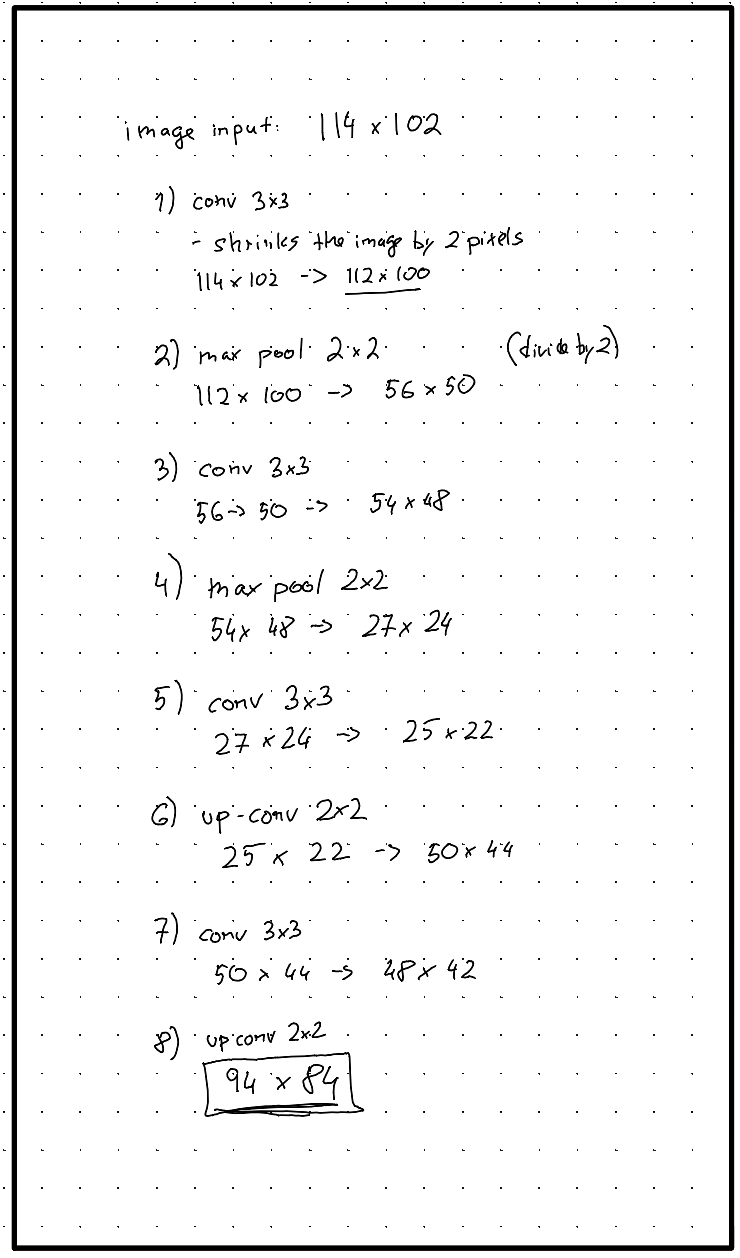